Inspired from https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l05c01_dogs_vs_cats_without_augmentation.ipynb?authuser=1#scrollTo=K6oA77ADVrWp

The following note book is a part of the:

Udacity Course:

 **Introduction to Deep Learning**

## **Goal**:-

We will learn about the overfitting from the datasets where training accuracy is nearly to 100 percent and validation and test have very poor accuracy.


We will use Sequential model along with the ImageGenerator from KERAS to load and process the datasets

### Python Imports

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from  tensorflow.keras.preprocessing.image import ImageDataGenerator

### Datasets

We will use truncated Cats and Dogs Datasets from Kaggle

Datasets:- https://www.kaggle.com/c/dogs-vs-cats/data

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'


In [0]:
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
!cd /root/.keras
!ls

sample_data


In [0]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:
zip_dir_base = os.path.dirname(zip_dir)

In [0]:
zip_dir_base

'/root/.keras/datasets'

In [0]:
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [0]:
cat_and_dogs_filetered = os.path.join(zip_dir_base, 'cats_and_dogs_filtered')

In [0]:
cat_and_dogs_filetered

'/root/.keras/datasets/cats_and_dogs_filtered'

In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print(total_val)
print(total_train)

1000
2000


In [0]:
print("Training Cats examples: {}".format(len(os.listdir(train_cats_dir))))
print("Training Dogs examples: {}".format(len(os.listdir(train_dogs_dir))))
print("Validation Cats examples: {}".format(len(os.listdir(validation_cats_dir))))
print("Validation Dogs examples: {}".format(len(os.listdir(validation_dogs_dir))))

print('-------')


Training Cats examples: 1000
Training Dogs examples: 1000
Validation Cats examples: 500
Validation Dogs examples: 500
-------


In [0]:
BATCH_SIZE  = 100
IMG_SHAPE = 150

In [0]:
# WE NEED TO RESCALE THE IMAGE

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [0]:
train_image_generator

We will use flow_from_directory method which will resize the image available in the datasets, apply batch size, and shuffle the data.

In [0]:
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='binary',
    target_size=(IMG_SHAPE, IMG_SHAPE),
    directory=train_dir
)

Found 2000 images belonging to 2 classes.


In [0]:
validation_data_gen = train_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='binary',
    target_size=(IMG_SHAPE, IMG_SHAPE),
    directory=validation_dir
)

Found 1000 images belonging to 2 classes.


### **Visualize the Image**

In [0]:
def plotimages(images_list):
    fig, axes = plt.subplots(1,5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_list, axes.flatten()):
        ax.imshow(img)
    plt.show()

In [0]:
# get the iamges data
sample_training_images, _ = next(train_data_gen)

In [0]:
len(sample_training_images)

100

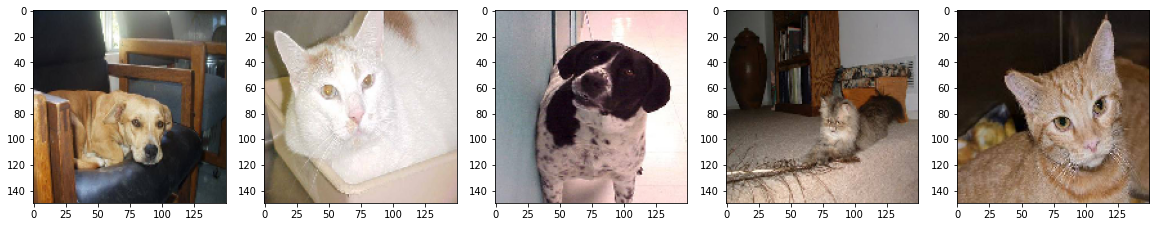

In [0]:
plotimages(sample_training_images[:5])

### **Model creation**

we will have the model which contains

(1) 4 conv 2d blocks + macpooling.

(2) flatten layer

(3) dense layer with 2 output (Cat and dog)

(4) dense layer with 512 layer with relu as a activation

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [0]:
model

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [0]:
type(total_validation)

str

### Train the model

In [0]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=validation_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
20/20 [==============================] - 10s 512ms/step - loss: 0.7244 - accuracy: 0.5025 - val_loss: 0.6925 - val_accuracy: 0.5310
Epoch 2/100
20/20 [==============================] - 10s 516ms/step - loss: 0.6918 - accuracy: 0.5150 - val_loss: 0.6873 - val_accuracy: 0.5280
Epoch 3/100
20/20 [==============================] - 10s 516ms/step - loss: 0.6864 - accuracy: 0.5545 - val_loss: 0.6764 - val_accuracy: 0.5160
Epoch 4/100
20/20 [==============================] - 10s 505ms/step - loss: 0.6688 - accuracy: 0.5895 - val_loss: 0.6757 - val_accuracy: 0.5570
Epoch 5/100
20/20 [==============================] - 10s 509ms/step - loss: 0.6405 - accuracy: 0.6425 - val_loss: 0.6727 - val_accuracy: 0.5710
Epoch 6/100
20/20 [==============================] - 10s 510ms/step - loss: 0.6155 - accuracy: 0.6595 - val_loss: 0.5996 - val_accuracy: 0.6740
Epoch 7/100
20/20 [==============================] - 10s 511ms/step - loss: 0.5730 - accuracy: 0.6905 - val_loss: 0.6068 - val_accuracy:

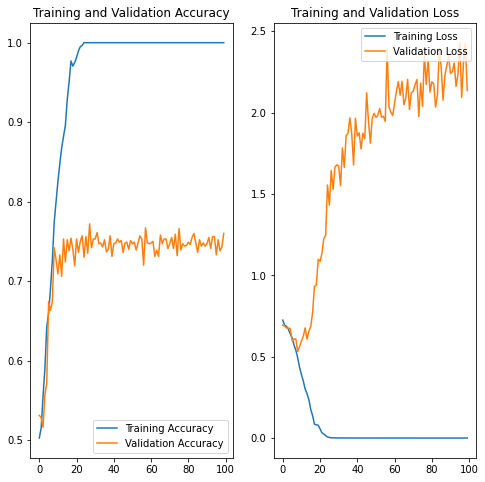

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

THe above diagram explains that the training accuracy is 100 percent which is because of overfitting